# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Simionato

Student name: Giuseppe
    
ID: 1170622

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1170622 # place a random seed
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [68 45 66 49 61 63 77 58 60 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


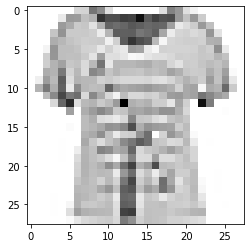

LABEL: 0
INPUT:


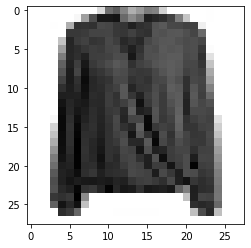

LABEL: 6
INPUT:


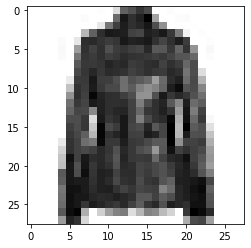

LABEL: 4
INPUT:


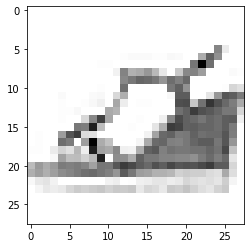

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM

lin = GridSearchCV(SVC(kernel='linear'), parameters, cv=4)
lin.fit(X_train,y_train)

means = lin.cv_results_['mean_test_score']
stds = lin.cv_results_['std_test_score']
params = lin.cv_results_['params']

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found: %r" %lin.best_params_)

print('Score with best parameters: %0.3f' %lin.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}
Score with best parameters: 0.780
All scores on the grid:
0.542 (+/- 0.020) for {'C': 0.001}
0.755 (+/- 0.047) for {'C': 0.01}
0.780 (+/- 0.060) for {'C': 0.1}
0.767 (+/- 0.047) for {'C': 1}
0.767 (+/- 0.047) for {'C': 10}
0.767 (+/- 0.047) for {'C': 100}


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

pol2 = GridSearchCV(SVC(kernel='poly', degree=2), parameters, cv=4)
pol2.fit(X_train,y_train)

means = pol2.cv_results_['mean_test_score']
stds = pol2.cv_results_['std_test_score']
params = pol2.cv_results_['params']

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found: %r" %pol2.best_params_)

print('Score with best parameters: %0.3f' %pol2.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.5, 'gamma': 0.05}
Score with best parameters: 0.763
All scores on the grid:
0.727 (+/- 0.063) for {'C': 0.05, 'gamma': 0.05}
0.758 (+/- 0.064) for {'C': 0.05, 'gamma': 0.5}
0.758 (+/- 0.064) for {'C': 0.05, 'gamma': 5.0}
0.763 (+/- 0.067) for {'C': 0.5, 'gamma': 0.05}
0.758 (+/- 0.064) for {'C': 0.5, 'gamma': 0.5}
0.758 (+/- 0.064) for {'C': 0.5, 'gamma': 5.0}
0.758 (+/- 0.064) for {'C': 5, 'gamma': 0.05}
0.758 (+/- 0.064) for {'C': 5, 'gamma': 0.5}
0.758 (+/- 0.064) for {'C': 5, 'gamma': 5.0}


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

pol4 = GridSearchCV(SVC(kernel='poly', degree=degree), parameters, cv=4)
pol4.fit(X_train,y_train)

means = pol4.cv_results_['mean_test_score']
stds = pol4.cv_results_['std_test_score']
params = pol4.cv_results_['params']

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found: %r" %pol4.best_params_)

print('Score with best parameters: %0.3f' %pol4.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found: {'C': 0.5, 'gamma': 0.05}
Score with best parameters: 0.703
All scores on the grid:
0.700 (+/- 0.021) for {'C': 0.05, 'gamma': 0.05}
0.678 (+/- 0.026) for {'C': 0.05, 'gamma': 0.5}
0.678 (+/- 0.026) for {'C': 0.05, 'gamma': 5.0}
0.703 (+/- 0.031) for {'C': 0.5, 'gamma': 0.05}
0.678 (+/- 0.026) for {'C': 0.5, 'gamma': 0.5}
0.678 (+/- 0.026) for {'C': 0.5, 'gamma': 5.0}
0.678 (+/- 0.026) for {'C': 5, 'gamma': 0.05}
0.678 (+/- 0.026) for {'C': 5, 'gamma': 0.5}
0.678 (+/- 0.026) for {'C': 5, 'gamma': 5.0}


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

rbf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=4)
rbf.fit(X_train,y_train)

means = rbf.cv_results_['mean_test_score']
stds = rbf.cv_results_['std_test_score']
params = rbf.cv_results_['params']

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found: %r" %rbf.best_params_)

print('Score with best parameters: %0.3f' %rbf.best_score_)

print("All scores on the grid:")
for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, param))

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.768
All scores on the grid:
0.722 (+/- 0.026) for {'C': 0.5, 'gamma': 0.005}
0.665 (+/- 0.043) for {'C': 0.5, 'gamma': 0.05}
0.128 (+/- 0.006) for {'C': 0.5, 'gamma': 0.5}
0.128 (+/- 0.006) for {'C': 0.5, 'gamma': 5}
0.768 (+/- 0.048) for {'C': 5, 'gamma': 0.005}
0.738 (+/- 0.058) for {'C': 5, 'gamma': 0.05}
0.128 (+/- 0.006) for {'C': 5, 'gamma': 0.5}
0.128 (+/- 0.006) for {'C': 5, 'gamma': 5}
0.767 (+/- 0.049) for {'C': 50, 'gamma': 0.005}
0.738 (+/- 0.058) for {'C': 50, 'gamma': 0.05}
0.128 (+/- 0.006) for {'C': 50, 'gamma': 0.5}
0.128 (+/- 0.006) for {'C': 50, 'gamma': 5}
0.767 (+/- 0.049) for {'C': 500, 'gamma': 0.005}
0.738 (+/- 0.058) for {'C': 500, 'gamma': 0.05}
0.128 (+/- 0.006) for {'C': 500, 'gamma': 0.5}
0.128 (+/- 0.006) for {'C': 500, 'gamma': 5}


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset?

Starting from the output of the various kernels we can see that they bring to differents results. The linear kernel give a better predictor than the two polynomials one but the best is the gaussian kernel. This is coherent with what we expected because with the RBF we can learn any polynomial predictor. We can see also the value of C which changes from a kernel to the other and this highlights that every predictor uses a different margin for the model.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf', C=5, gamma=0.005)
best_SVM.fit(X_train, y_train)

train_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % train_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.050000
Best SVM test error: 0.208750


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 

def plot_data(model, X_train, y_train, X_test, y_test, train_error, test_error):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],1-test_error))
    
    plt.show()

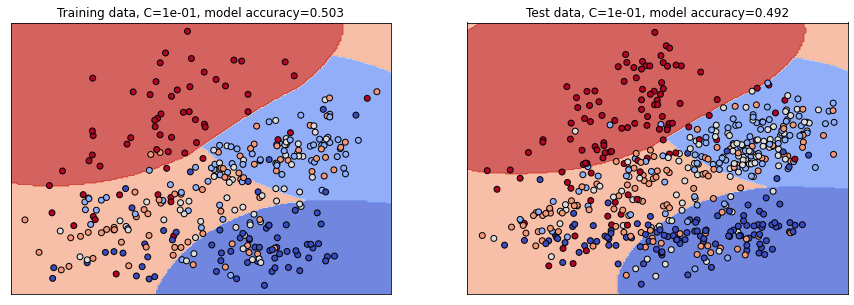

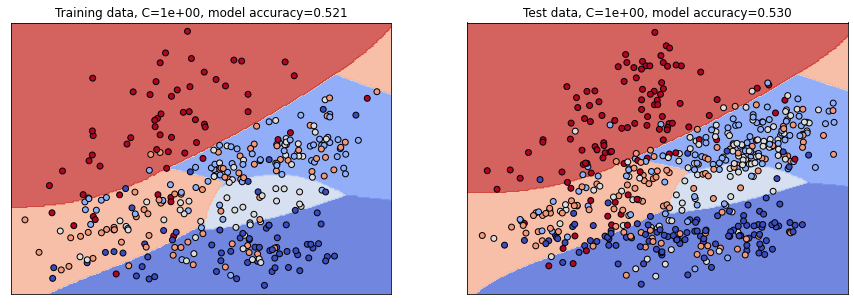

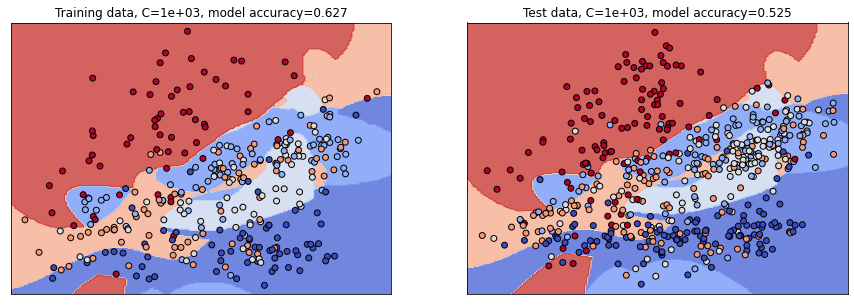

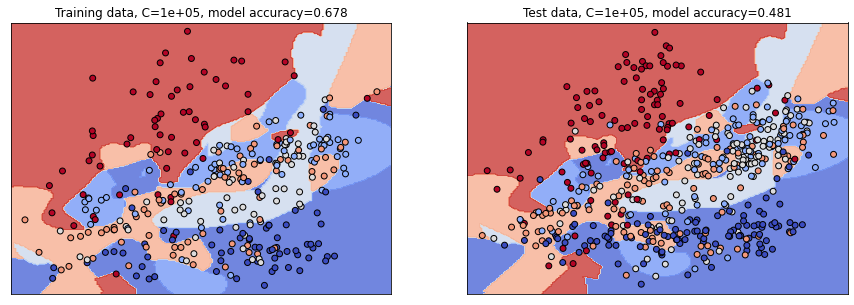

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,2,4,6,8] 

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    
    my_svm = SVC(kernel='rbf', C=C, gamma=gamma)
    my_svm.fit(X_train_pca, y_train_plot)
    
    train_error = 1 - my_svm.score(X_train_pca, y_train_plot)
    test_error = 1 - my_svm.score(X_test_pca, y_test_plot)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot, train_error, test_error)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C?

The changing of the value of C brings to a more splitted plot with more small isolated regions. With a growing value of C we can see that the margin is reduce $(C = 1/\lambda)$ and we have also smaller errors, but this fact leads to the overfitting issue of the data. It's important to underline that the set of labels chosen for these plots give the best accuracy with the hightest value of C for the training set and with C = 1 for the test set.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


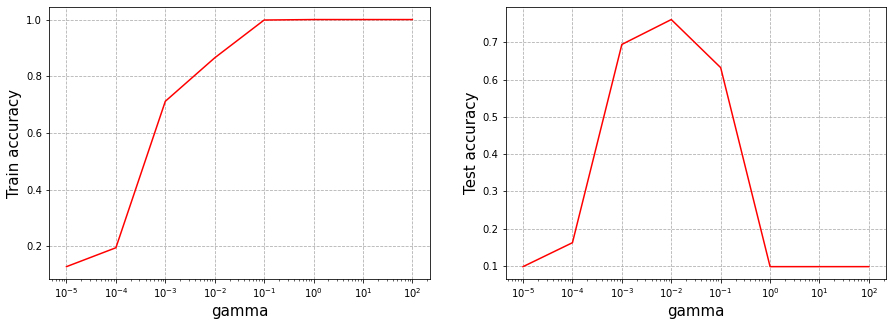

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []
C = 1

for g in gamma_values:
    
    my_svm = SVC(kernel='rbf', C=C, gamma=g)
    my_svm.fit(X_train, y_train)
    
    train_acc_list.append(my_svm.score(X_train, y_train))
    test_acc_list.append(my_svm.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list, color = 'r')
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma', fontsize=15)
ax[0].set_ylabel('Train accuracy', fontsize=15)
ax[0].grid(True, linestyle='--')

ax[1].plot(gamma_values, test_acc_list, color='r')
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma', fontsize=15)
ax[1].set_ylabel('Test accuracy', fontsize=15)
ax[1].grid(True, linestyle='--')


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma? 
Connect your answers to the discussion about the overfitting issue.

We can see that the trend for the train and the test accuracy is a little bit different. The training accuracy is decreasing with the increasing value of gamma instead of the test one which initially decrease until it reaches a minimum. The best value of gamma is the trade-off between an high accuracy with the risk of overfitting and a more general solution but not really very accurate. I chose for the best gamma 0.0005 because this value avoid a model too close to data (i.e. the overfitting issue) and it has a good accuracy even if it's not the best one.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [141 154 159 159 125 167 171 137 143 144]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

best_SVM.fit(X_train,y_train)
y_pred = best_SVM.predict(X_test)

train_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % train_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.063333
Best SVM test error: 0.173795


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5,  max_iter=2000)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)

test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" %training_error)
print ("Best logistic regression test error: %f" %test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.222650


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
logreg = linear_model.LogisticRegression(C=1,  max_iter=2000)
logreg.fit(X_train, y_train)
pre_test = logreg.predict(X_test)

training_error = 1 - logreg.score(X_train, y_train)

test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" %training_error)
print ("Best regularized logistic regression test error: %f" %test_error)

Best regularized logistic regression training error: 0.011333
Best regularized logistic regression test error: 0.197009


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

Answer:
- The two results from the SVM with the two values of m highlights that with more data points we have a bigger error in the training set but a smaller in the test one. This is beacuse with more data the model can train itself better and the algorithm can find a more general solution which it is also good for other set like we see in the test.

- At first we notice that the solutions of the two Logistic Regression are a little bit different and this is thanks to the regularization used in the second one (smaller C) that it has brought to a more stable solution (i.e a less risk of overfitting, just like it's happened for the training set in the first Regression).
Looking at the SVM and at the second Regression we have a training error smaller in the second case, maybe this is because the SVM works on a more general solution instead the Logistic Regression tries to fit to the best the training set. This hypothesis is supported also by the results for the test set where we have the test error smaller for the SVM. 

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


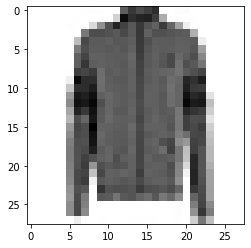

LABEL: 4
INPUT:


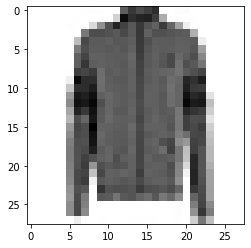

LABEL: 6


In [21]:
i = 0
while y_test[i] == pre_test[i] or y_test[i] != y_pred[i]: i+=1

plot_input(X_test,y_test,i)
plot_input(X_test,pre_test,i)

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, y_pred)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None])

confusion_LR = skm.confusion_matrix(y_test, pre_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None])

Labels and frequencies in test set:  [5859 5846 5841 5841 5875 5833 5829 5863 5857 5856]

 Confusion matrix SVM  
 
 [[4583    9   95  291   22    5  771    0   82    1]
 [  35 5537   61  152   15    0   45    0    1    0]
 [ 104    2 4260   54  728    1  657    0   35    0]
 [ 264   24   64 5115  121    0  237    0   15    1]
 [  11   13  510  443 4032    3  844    0   18    1]
 [   8    0    1    4    0 5216    4  393   22  185]
 [ 847   10  765  168  378    3 3557    0   99    2]
 [   0    0    0    0    0  316    0 5075    7  465]
 [  14    5   91   86   35   73  118   26 5399   10]
 [   1    1    1    2    0   88    3  200    1 5559]]

 Confusion matrix SVM (normalized)   
 
 [[0.78 0.   0.02 0.05 0.   0.   0.13 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.73 0.01 0.12 0.   0.11 0.   0.01 0.  ]
 [0.05 0.   0.01 0.88 0.02 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.09 0.08 0.69 0.   0.14 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.07 0. 

In [23]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
v, counts = np.unique(y_pred, return_counts=True)
print("Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None])

z, counts = np.unique(pre_test, return_counts=True)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None])

Confusion matrix SVM (normalized)   
 
 [[0.78 0.   0.02 0.05 0.   0.   0.13 0.   0.01 0.  ]
 [0.01 0.99 0.01 0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.73 0.01 0.12 0.   0.11 0.   0.01 0.  ]
 [0.04 0.   0.01 0.81 0.02 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.1  0.08 0.76 0.   0.16 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.91 0.   0.07 0.   0.03]
 [0.14 0.   0.12 0.03 0.06 0.   0.57 0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.06 0.   0.89 0.   0.08]
 [0.   0.   0.02 0.02 0.01 0.01 0.02 0.   0.95 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.89]]

 Confusion matrix LR (normalized)   
 
 [[0.76 0.   0.02 0.04 0.01 0.   0.19 0.   0.01 0.  ]
 [0.   0.98 0.01 0.02 0.01 0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.68 0.01 0.12 0.   0.11 0.   0.01 0.  ]
 [0.07 0.01 0.03 0.83 0.04 0.   0.06 0.   0.   0.  ]
 [0.01 0.   0.14 0.06 0.7  0.   0.14 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.9  0.   0.09 0.01 0.05]
 [0.1  0.   0.11 0.03 0.09 0.   0.53 0.   0.01 0.  ]
 [0.   0.   0.   

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one? Make some guesses on the possible causes.

Firstly the confusion matrices show the difference that the two ways to solve the problem bring: the two solutions have different acuracy for the various calsses and a model is able to guess some classes better than the other one. We also can see that some classes are confused more frequently with some and they are never confused with others. This fact leads to differents values in the matrices and the meaning is clear: for example it's easier to swap a sneaker with a sandal than with a coat. As a consequence of this we have some classes with a lower accuracies than others that they have an highter one: just like for a human even for the machine some clothes or accessories are more difficult to recognise.